># **Clustering**

Clustering is the task of partitioning the dataset into groups, called **clusters**. ***The goal is to*** split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similar to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

> **k-Means Clustering**

**k-means clustering** is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. **The algorithm alternates between two steps**: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes. The following example illustrates the algorithm on a synthetic dataset:

*Input data and three steps of the k-means algorithm*




In [ ]:
!pip3 install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=9295d932ea95e8f26ed98b883119bea88efc792fca0a51ceb6d47e72266ad758
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


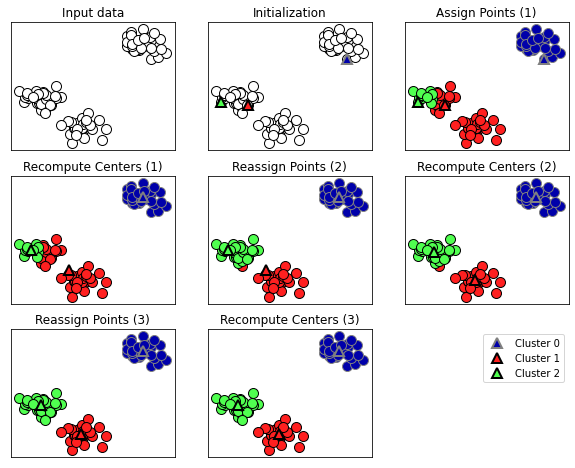

In [ ]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as ***triangles***, while data points are shown as ***circles***. Colors indicate cluster membership. *We specified that we are looking for* ***three clusters***, so the algorithm was initialized by declaring ***three data points*** randomly as cluster centers (see “Initialization”). Then the iterative algorithm starts. **First**, each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). **Next**, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”). **Then** the process is repeated two more times. After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.

**Given new data points**, k-means will assign each to the closest cluster center. **The next example shows** the boundaries of the cluster centers that were learned:

*Cluster centers and cluster boundaries found by the k-means algorithm*

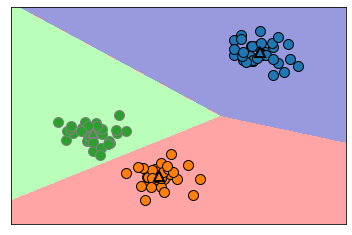

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

Applying k-means with scikit-learn is quite straightforward. Here, we apply it to the synthetic data that we used for the preceding plots. We instantiate the **K-Means** class, and set the number of clusters we are looking for. Then we call the **fit** method with the data:



In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

During the algorithm, each training data point in X is assigned a cluster label. You can find these labels in the **kmeans.labels_** attribute:



In [ ]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


As we asked for three clusters, the clusters are numbered 0 to 2.

You can also assign cluster labels to new points, using the **predict** method. Each new point is assigned to the closest cluster center when predicting, but the existing model is not changed. Running **predict** on the training set returns the same result as **labels_**:



In [ ]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


*You can see that clustering is somewhat similar to classification, in that each item gets a label. But running the algorithm again might result in a different numbering of clusters because of the random nature of the initialization.* Here is a plot of this data again. The cluster centers are stored in the **clustercenters** attribute, and we plot them as triangles:

*Cluster assignments and cluster centers found by k-means with three clusters*



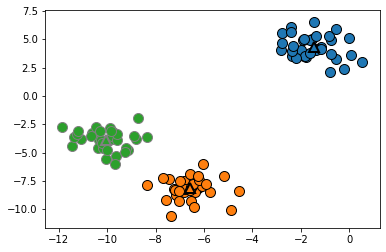

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

We can also use more or fewer cluster centers:



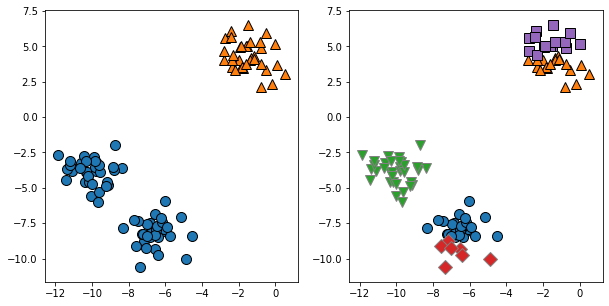

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

You can see cluster assignments found by k-means using two clusters (left) and five clusters (right).

> **Failure cases of k-means**

Even if you know the “right” number of clusters for a given dataset, k-means might not always be able to recover them. Each cluster is defined solely by its center, which means that each cluster is a convex shape. **As a result of this, k-means can only capture relatively simple shapes.** k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. That can sometimes lead to surprising results:

*Cluster assignments found by k-means when clusters have different densities*

Text(0, 0.5, 'Feature 1')

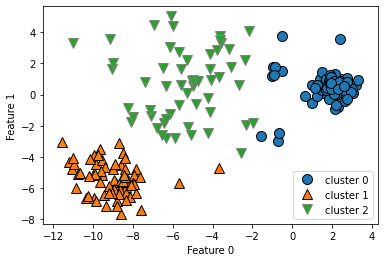

In [ ]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. Instead, both cluster 0 and cluster 1 have some points that are far away from all the other points in these clusters that “reach” toward the center. The real points postitions can be seen in the figure:



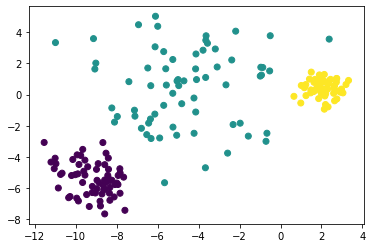

In [ ]:
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)

***k-means also assumes that all directions are equally important for each cluster.*** The following plot shows a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data:

*k-means fails to identify non-spherical clusters*

Text(0, 0.5, 'Feature 1')

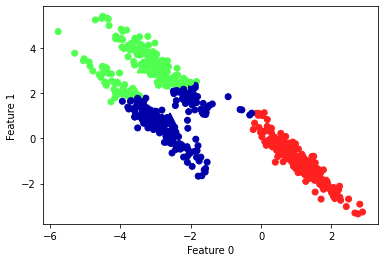

In [ ]:
import numpy as np
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means also performs poorly if the clusters have more complex shapes, like the two_moons data:


Text(0, 0.5, 'Feature 1')

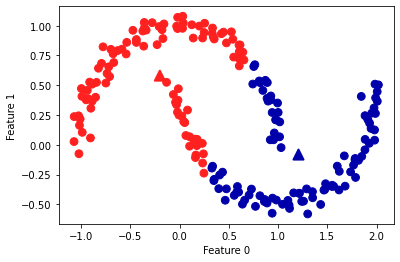

In [ ]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, we would hope that the clustering algorithm can discover the two half-moon shapes. However, this is not possible using the k-means algorithm.

You see that **k-means is limited to linear cluster boundaries**. The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.

This situation is reminiscent of the discussion in Support Vector Machines, where we used a **kernel transformation** to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the **SpectralClustering** estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


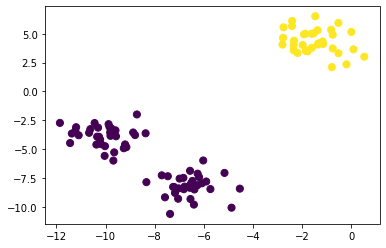

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)

We see that with this kernel transform approach, the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters.

> **Summary**

k-means is a very popular algorithm for clustering, not only because it is relatively easy to understand and implement, but also because it runs relatively quickly.

**One of the drawbacks** of k-means is that it relies on a random initialization, which means the outcome of the algorithm depends on a random seed. By default, scikit-learn runs the algorithm 10 times with 10 different random initializations, and returns the best result (“best” means that the sum of variances of the clusters is small.).

**Further downsides of k-means are the relatively restrictive assumptions** made on the shape of clusters, and the requirement to specify the number of clusters you are looking for (which might not be known in a real-world application).

Because each iteration of k-means must access every point in the dataset, **the algorithm can be relatively slow** as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step. This is the idea behind **batch-based k-means** algorithms, one form of which is implemented in **sklearn.cluster.MiniBatchKMeans.** The interface for this is the same as for standard KMeans; we will see an example of its use as we continue our discussion.


># **Examples of using k-means**

> **Example 1: k-means on digits-dataset**

To start, let's take a look at applying k-means on the simple digits dataset. Here we will attempt to use k-means to try to **identify similar digits** without using the original label information; this might be similar to a ***first step*** in extracting meaning from a new dataset about which you don't have any a priori label information.

We will start by loading the digits and then finding the k-Means clusters. The dataset consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:



In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:



In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

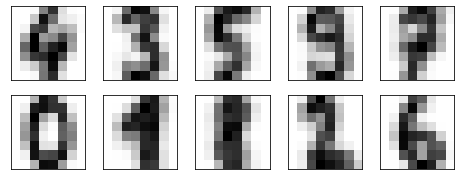

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, **k-Means is able to find clusters** whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let's check the ***confusion matrix*** for this:



Text(91.68, 0.5, 'predicted label')

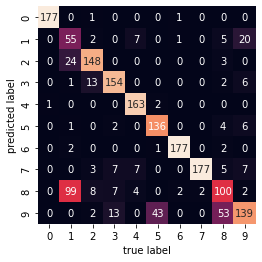

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

As we might expect from the cluster centers we visualized before, ***the main point of confusion is between the eights and ones.*** But this still shows that using k-means, we can essentially build a digit classifier without reference to any known labels!

Just for fun, let's try to push this even further. ***We can use t-SNE algorithm to pre-process the data before performing k-means.*** t-SNE is a non-linear embedding algorithm that is particularly adept at preserving points within clusters. Let's see how it does:

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.9432387312186978

That's nearly 94% classification accuracy without using the labels. ***This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.***

> **Example 2: k-means for color compression**

One interesting application of clustering is in ***color compression within images.*** For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to have the pillow Python package installed).



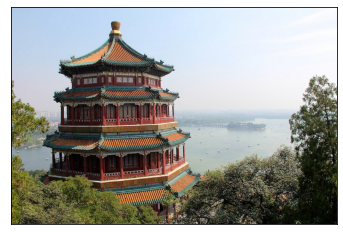

In [ ]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:



In [ ]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:



In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [ ]:
 def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

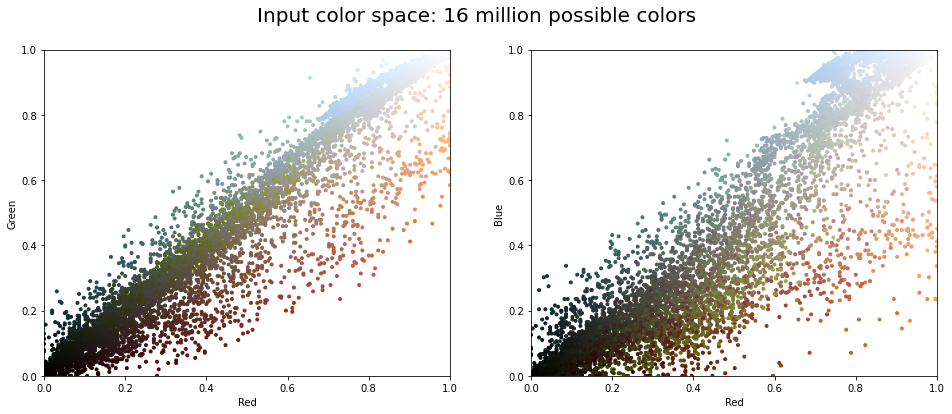

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini-batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:



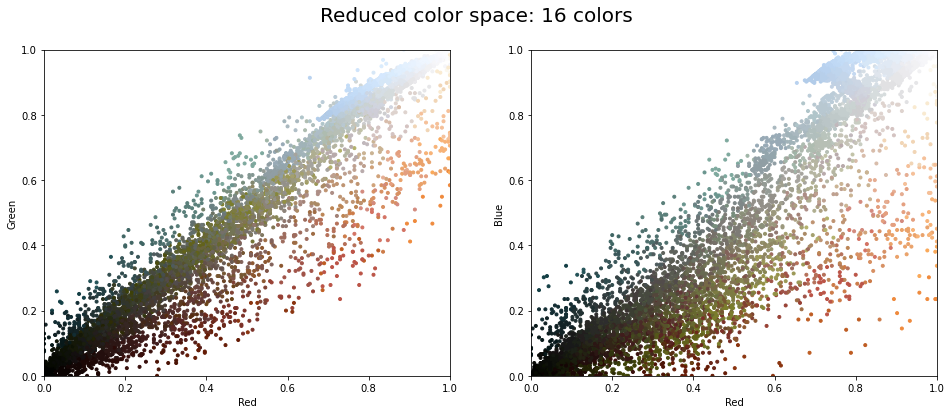

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a re-coloring of the original pixels, **where each pixel is assigned the color of its closest cluster center.** Plotting these new colors in the image space rather than the pixel space shows us the effect of this:



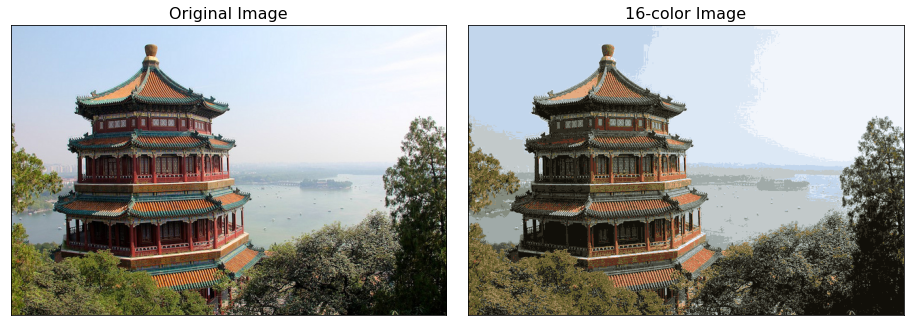

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

***Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable.*** This image on the right achieves a compression factor of around 1 million! While this is an interesting application of k-means, there are certainly better ways to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like k-means.



**Task.** Apply kMeans to Iris Dataset. You can assume that the number of classes is 3. Visualize the three clusters that were formed by kMeans.